# Задача 1

Для маркетингового исследования случайным образом необходимо отобрать N людей. Этим людям
далее демонстрируется кофе марки Nescafe в упаковке с новым дизайном: вместо классической этикетки
в коричнево-золотых тонах – новогодняя этикетка в красно-зеленых тонах. После этого фиксируется,
сколько людей захотели купить этот кофе, а точнее, доля таких людей.

Рассчитайте необходимый объем выборки для тестовой группы, если известно, что
- выбран 95%-ный уровень доверия;
- погрешность не должна превышать 3%;
- нет определенных ожиданий относительно доли людей, которые захотят кофе с измененным дизайном этикетки (считается, что человек с равной вероятностью выберет кофе или не выберет).

In [2]:
# Для уровня доверия 95% z = 1.96:

z = 1.96

error = 0.03

p = 0.5

n = z**2 * p * (1 - p) / error**2

print('Объём тестовой выборки составляет: ' + str(round(n)))

Объём тестовой выборки составляет: 1067


# Задача 2

Решите задачу 1, учитывая, что теперь ожидаемая доля людей, которые захотят купить кофе с
измененным дизайном этикетки, известна и равна 0.67 (группа аналитиков нашла старый отчет с
результатами аналогичного эксперимента).

Какой из необходимых объемов выборки больше: в случае, когда мы считаем, что шансы выбрать и не
выбрать кофе одинаковы или в случае, когда ожидаемая доля выбравших кофе нам известна и равна
0.67? 

Сделайте вывод о связи между ожидаемой долей и необходимым объемом выборки при прочих
равных условиях (тот же уровень доверия).

In [3]:
z = 1.96

error = 0.03

p_2 = 0.67

n_2 = z**2 * p_2 * (1 - p) / error**2

print('Объём тестовой выборки составляет: ' + str(round(n_2)))

Объём тестовой выборки составляет: 1430


### Выводы:
1. Для p=0.67 необходимый объём выборки больше, чем для P=0.5.
2. Чем больше ожидаемая доля, тем больше необходимый объём выборки.

# Задача 3

В файле experiment.csv сохранены результаты эксперимента, описанного в задаче 1. 

Данные представляют собой последовательности из 0 и 1, где:
- 1 соответствуют людям, которые захотели выбрать кофе с измененным дизайном этикетки, 
- 0 - людям, которые не захотели.

Описание данных:

test: результаты по тестовой группе (людям предлагали кофе с новым дизайном этикетки); 

control: контрольная группа (людям предлагали кофе со старым дизайном этикетки).

## Подзадачи

1. Загрузите данные из файла experiment.csv.
2. Постройте 90%-ный доверительный интервал для доли людей, которые захотели купить кофе, в тестовой группе. Проинтерпретируйте полученный доверительный интервал. В решении приведите используемый код, границы доверительного интервала и текст с интерпретацией.
3. Постройте 90%-ный доверительный интервал для доли людей, которые захотели купить кофе, в контрольной группе. Проинтерпретируйте полученный доверительный интервал. В решении приведите используемый код, границы доверительного интервала и текст с интерпретацией.
4. Сравните полученные доверительные интервалы для тестовой и контрольной группы. Можно ли на основании полученных результатов сделать определенный вывод о том, что новый дизайн этикетки лучше (привлекает больше потенциальных покупателей)? Приведите ваши выводы и объяснения.
5. Выполните пункты 1-3 в R. Изменились ли ваши выводы относительно полезности нового дизайна этикетки? Приведите код, результаты и текст с выводами.

## 1. Загрузим данные из файла experiment.csv.

In [4]:
import pandas as pd

df = pd.read_csv('experiment.csv')

## Исходный датафрейм:

In [5]:
df

,Unnamed: 0,control,test
0,1,0,0
1,2,1,1
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
995,996,0,1
996,997,1,0
997,998,0,1
998,999,1,1


## 2. Построим 90%-ный доверительный интервал для доли людей, которые захотели купить кофе, в тестовой группе. 
- Проинтерпретируем полученный доверительный интервал. 
- В решении приведём используемый код, границы доверительного интервала и текст с интерпретацией.

Доверительный интервал: (0.5513028270740822, 0.6026971729259177)


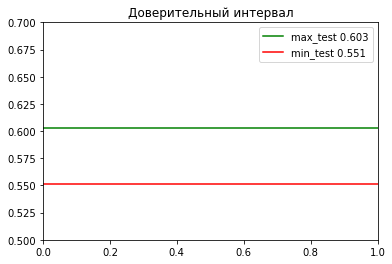

In [55]:
import scipy.stats as st

import matplotlib.pyplot as plt

import numpy as np

# Уровень доверия:

confidence = 0.9

# Количество людей, принявших участие в эксперименте:

n_3 = len(df)

# Доля людей, захотевших купить кофе, в тестовой группе:

test_p = df['test'][df['test'] == 1].count() / n_3

# Вычислим значение стендартной ошибки доли:

test_se = (test_p * (1 - test_p) / n_3)**0.5

# Вычислим доверительный интервал:

test_interval = st.norm.interval(confidence, test_p, test_se)

print('Доверительный интервал: ' + str(test_interval))

# Построим доверительный интервал:

plt.axhline(y=test_interval[1], color="g", linestyle="-", label='max_test ' + str(round(test_interval[1], 3)))

plt.axhline(y=test_interval[0], color="r", linestyle="-", label='min_test ' + str(round(test_interval[0], 3)))

plt.ylim([0.5, 0.7])

plt.legend()

plt.title("Доверительный интервал")

plt.show()

### 90-% доверительный интервал для доли людей из тестовой группы, захотевших купить кофе, лежит в пределах от 0.551 до 0.603.

## 3. Построим 90%-ный доверительный интервал для доли людей, которые захотели купить кофе, в контрольной группе. 
- Проинтерпретируем полученный доверительный интервал. 
- В решении приведём используемый код, границы доверительного интервала и текст с интерпретацией.

Доверительный интервал: (0.4380600794294326, 0.4899399205705674)


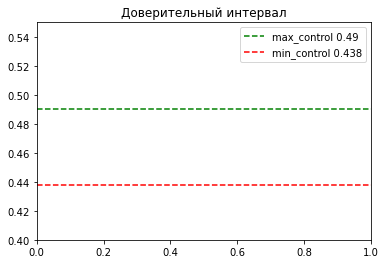

In [59]:
# Доля людей, захотевших купить кофе, в контрольной группе:

control_p = df['control'][df['control'] == 1].count() / n_3

# Вычислим значение стендартной ошибки доли:

control_se = (p_3_2 * (1 - p_3_2) / n_3)**0.5

# Вычислим доверительный интервал:

control_interval = st.norm.interval(confidence, control_p, control_se)

print('Доверительный интервал: ' + str(control_interval))

# Построим доверительный интервал:

plt.axhline(y=control_interval[1], color="g", linestyle="--", label='max_control ' + str(round(control_interval[1], 3)))

plt.axhline(y=control_interval[0], color="r", linestyle="--", label='min_control ' + str(round(control_interval[0], 3)))

plt.ylim([0.4, 0.55])

plt.legend()

plt.title("Доверительный интервал")

plt.show()

### 90-% доверительный интервал для доли людей из контрольной группы, захотевших купить кофе, лежит в пределах от 0.438 до 0.49.

## 4. Сравним полученные доверительные интервалы для тестовой и контрольной группы. 
- Можно ли на основании полученных результатов сделать определенный вывод о том, что новый дизайн этикетки лучше (привлекает больше потенциальных покупателей)? 
- Приведите ваши выводы и объяснения.

### Построим оба интервала на одном графике:

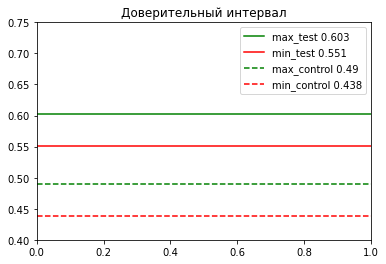

In [63]:
plt.axhline(y=test_interval[1], color="g", linestyle="-", label='max_test ' + str(round(test_interval[1], 3)))

plt.axhline(y=test_interval[0], color="r", linestyle="-", label='min_test ' + str(round(test_interval[0], 3)))

plt.axhline(y=control_interval[1], color="g", linestyle="--", label='max_control ' + str(round(control_interval[1], 3)))

plt.axhline(y=control_interval[0], color="r", linestyle="--", label='min_control ' + str(round(control_interval[0], 3)))

plt.legend()

plt.ylim([0.4, 0.75])

plt.title("Доверительный интервал")

plt.show()

### Вывод:
Видим, что интервалы не пересекаются, и что доверительный интервал для тестовой группы лежит выше, чем для контрольной, примерной на 1. Значит при изменении дизайна этикетки конверсия покупок кофе будет повышена, и изменения стоит вносить.